In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


# Read the DataSet.

In [2]:
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")

## Get the head of DataFrame.

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Check for NaN.

In [4]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## Get info about DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df["Make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

## Data visualization

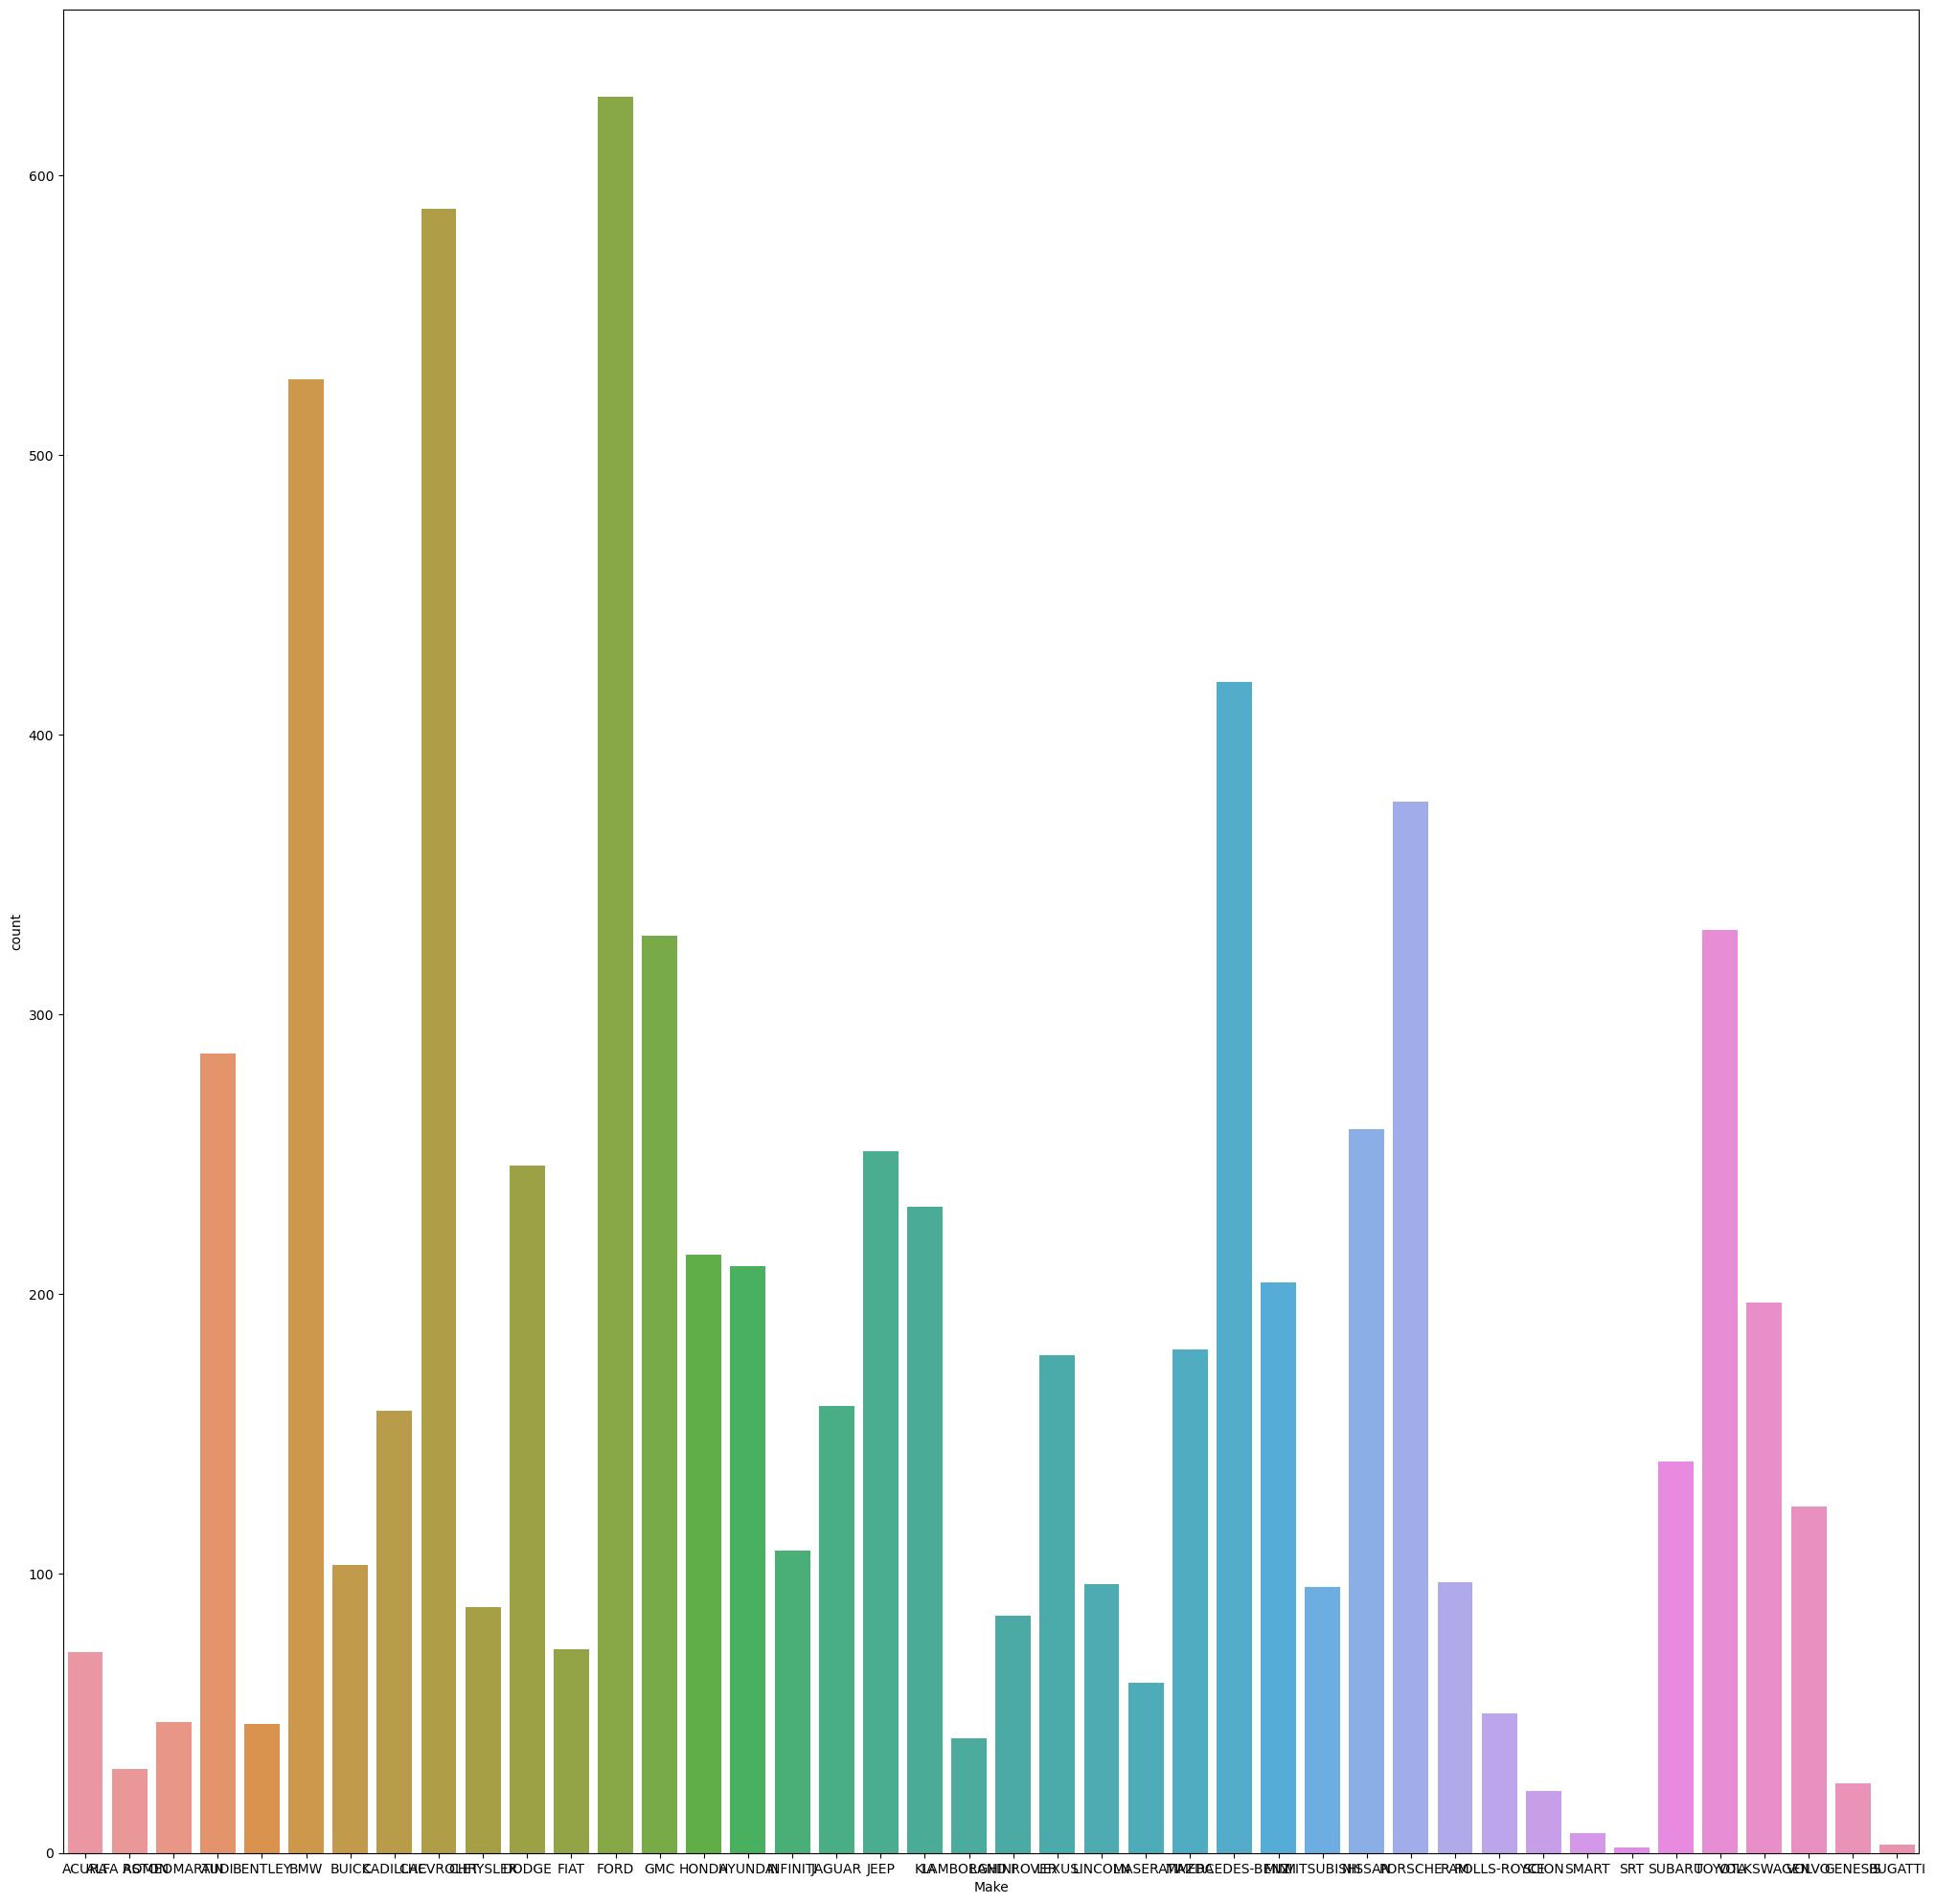

In [7]:
plt.figure(figsize=(25,25))
sns.countplot(x=df["Make"])
plt.show()

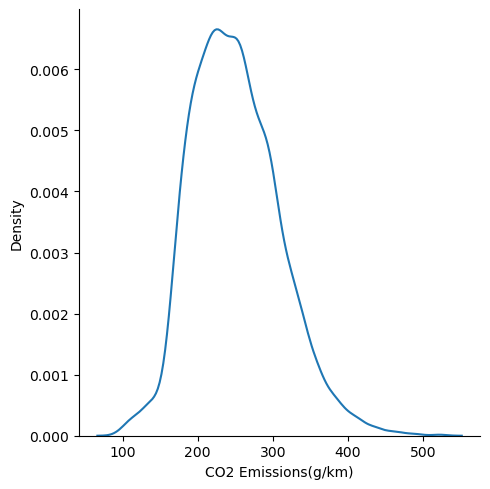

In [8]:
sns.displot(x=df["CO2 Emissions(g/km)"], kind="kde")

<AxesSubplot:xlabel='Vehicle Class', ylabel='count'>

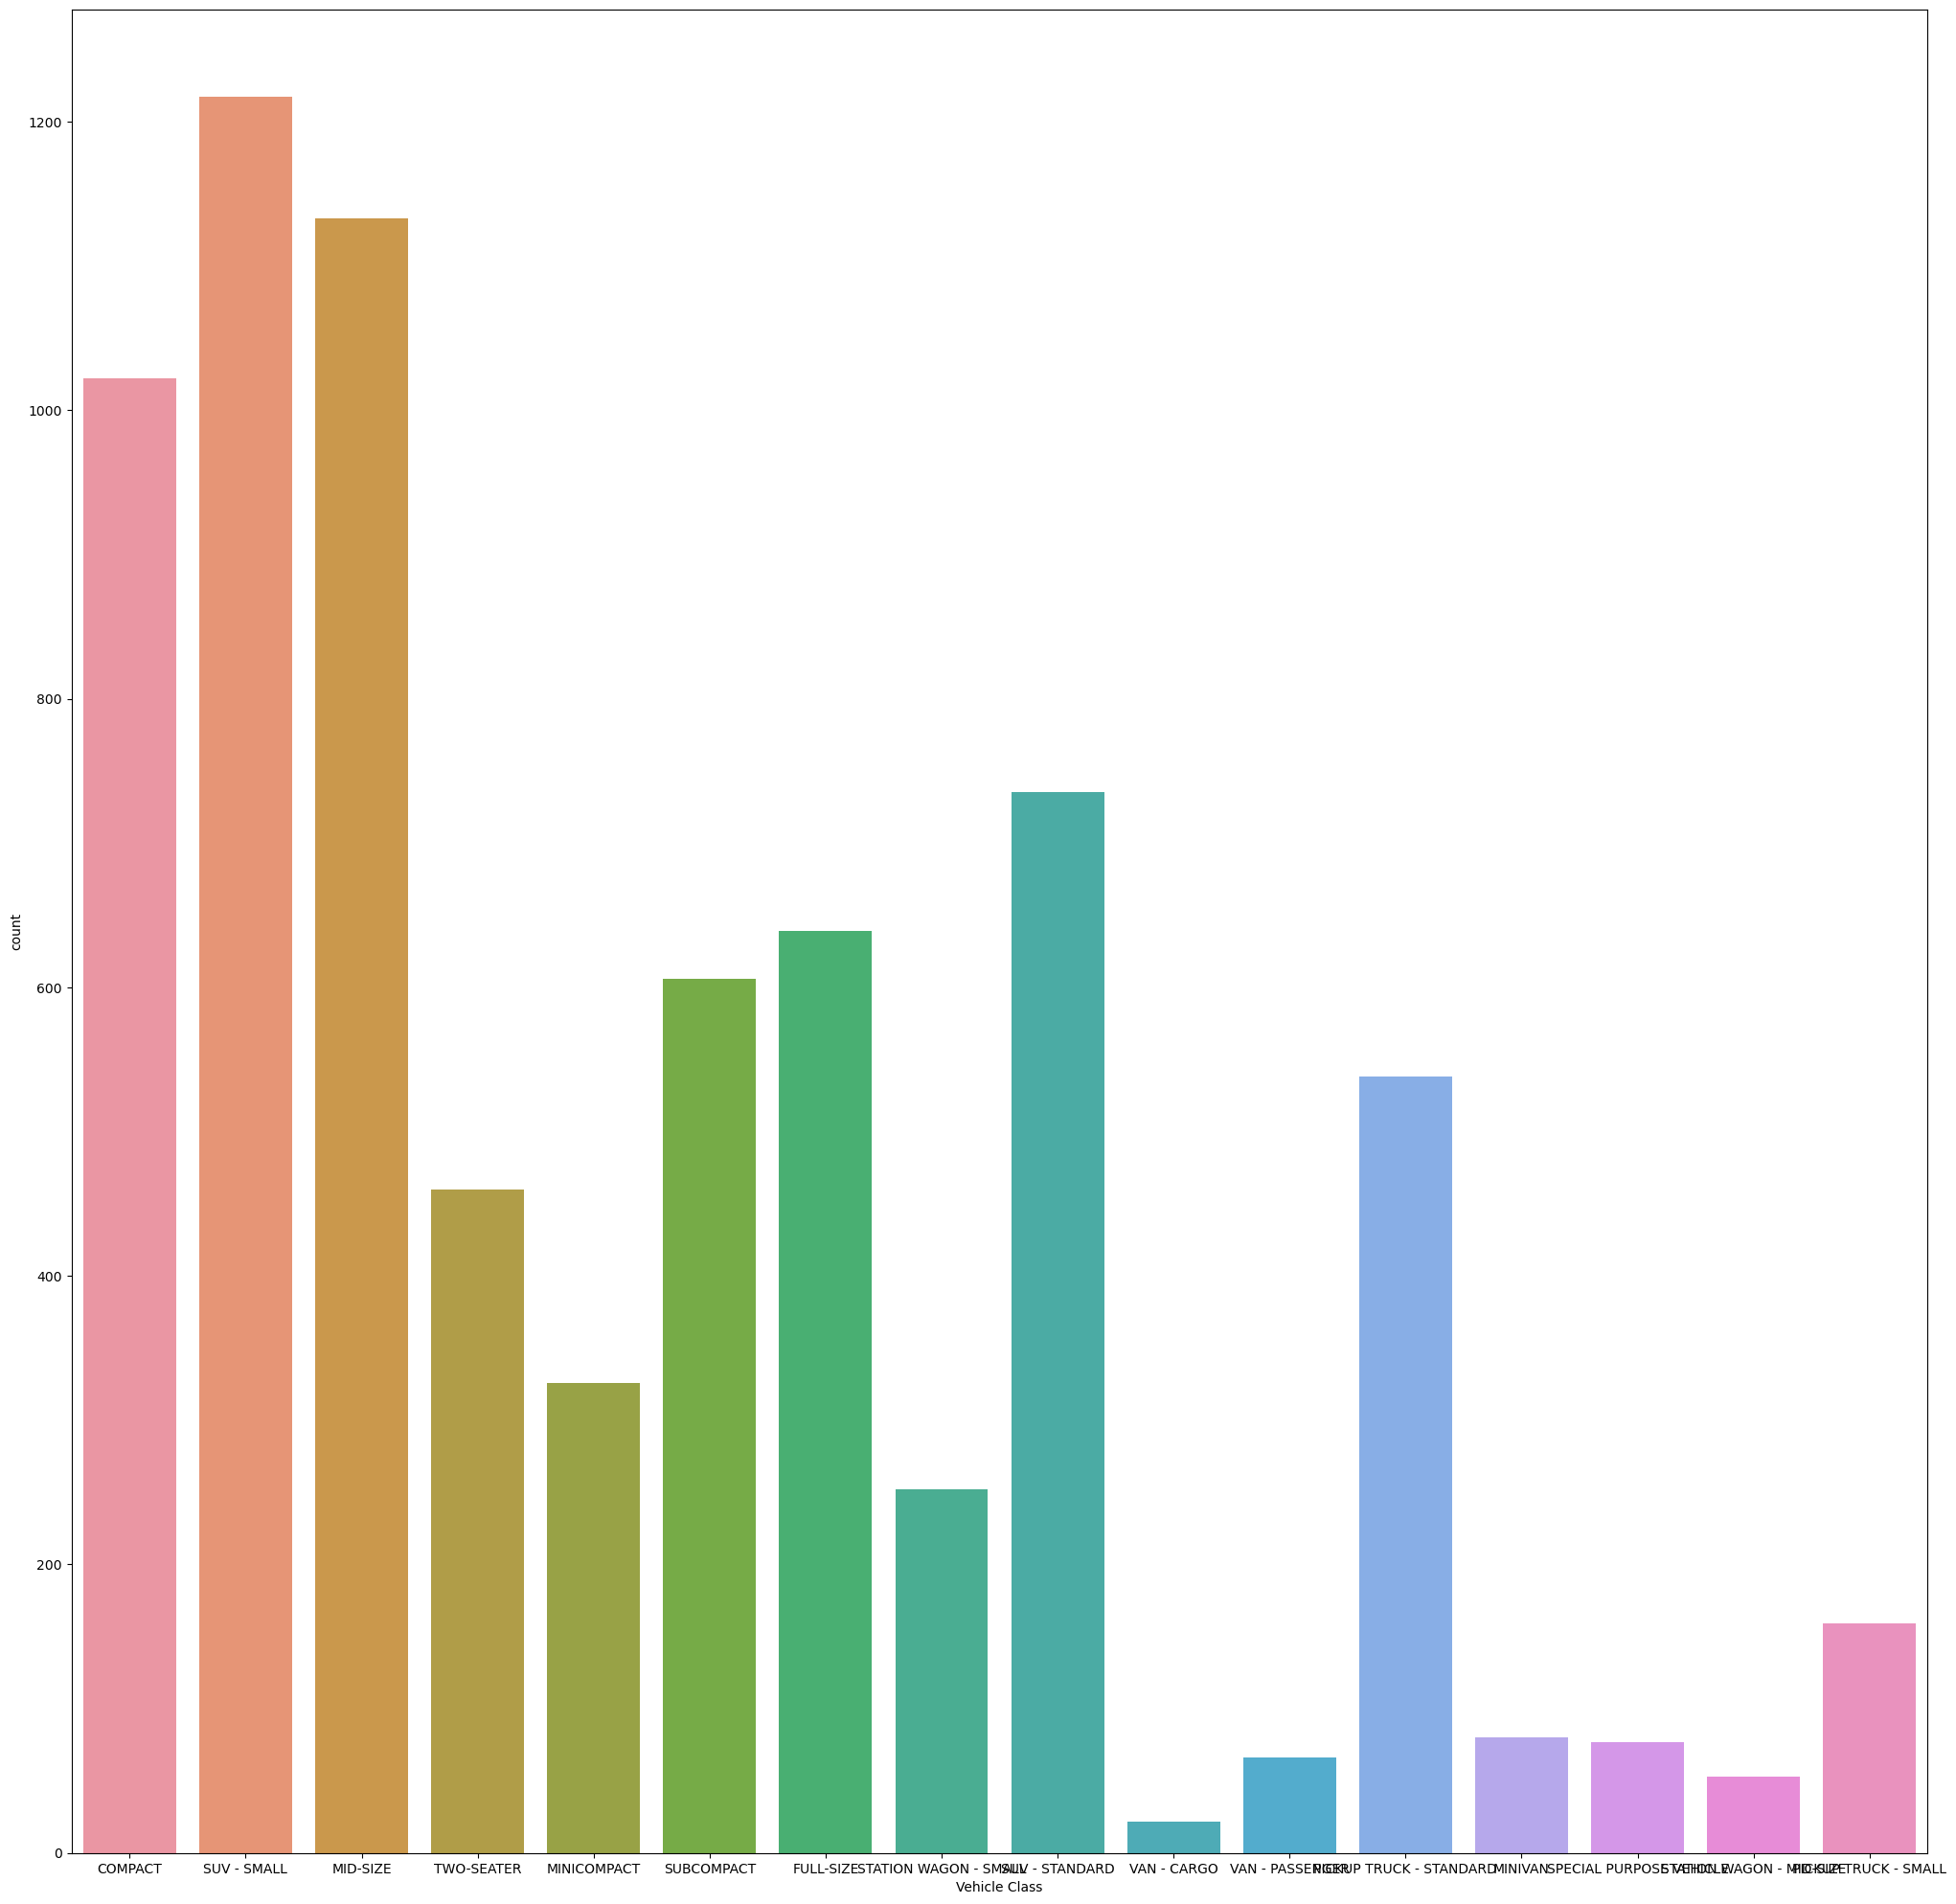

In [9]:
plt.figure(figsize=(25,25))
sns.countplot(x=df["Vehicle Class"])

array([[<AxesSubplot:title={'center':'Engine Size(L)'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel Consumption City (L/100 km)'}>],
       [<AxesSubplot:title={'center':'Fuel Consumption Hwy (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (mpg)'}>],
       [<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

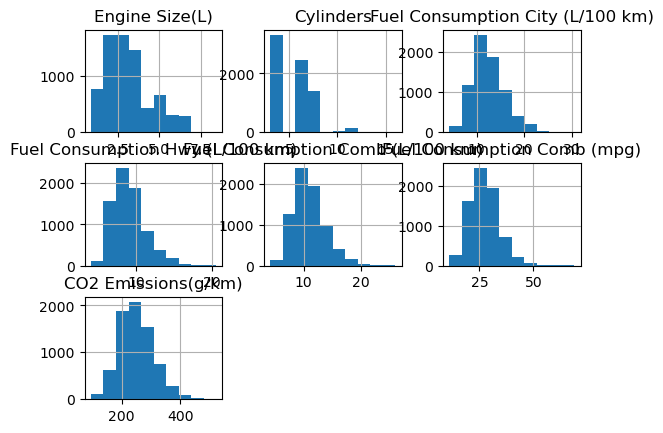

In [10]:
df.hist()

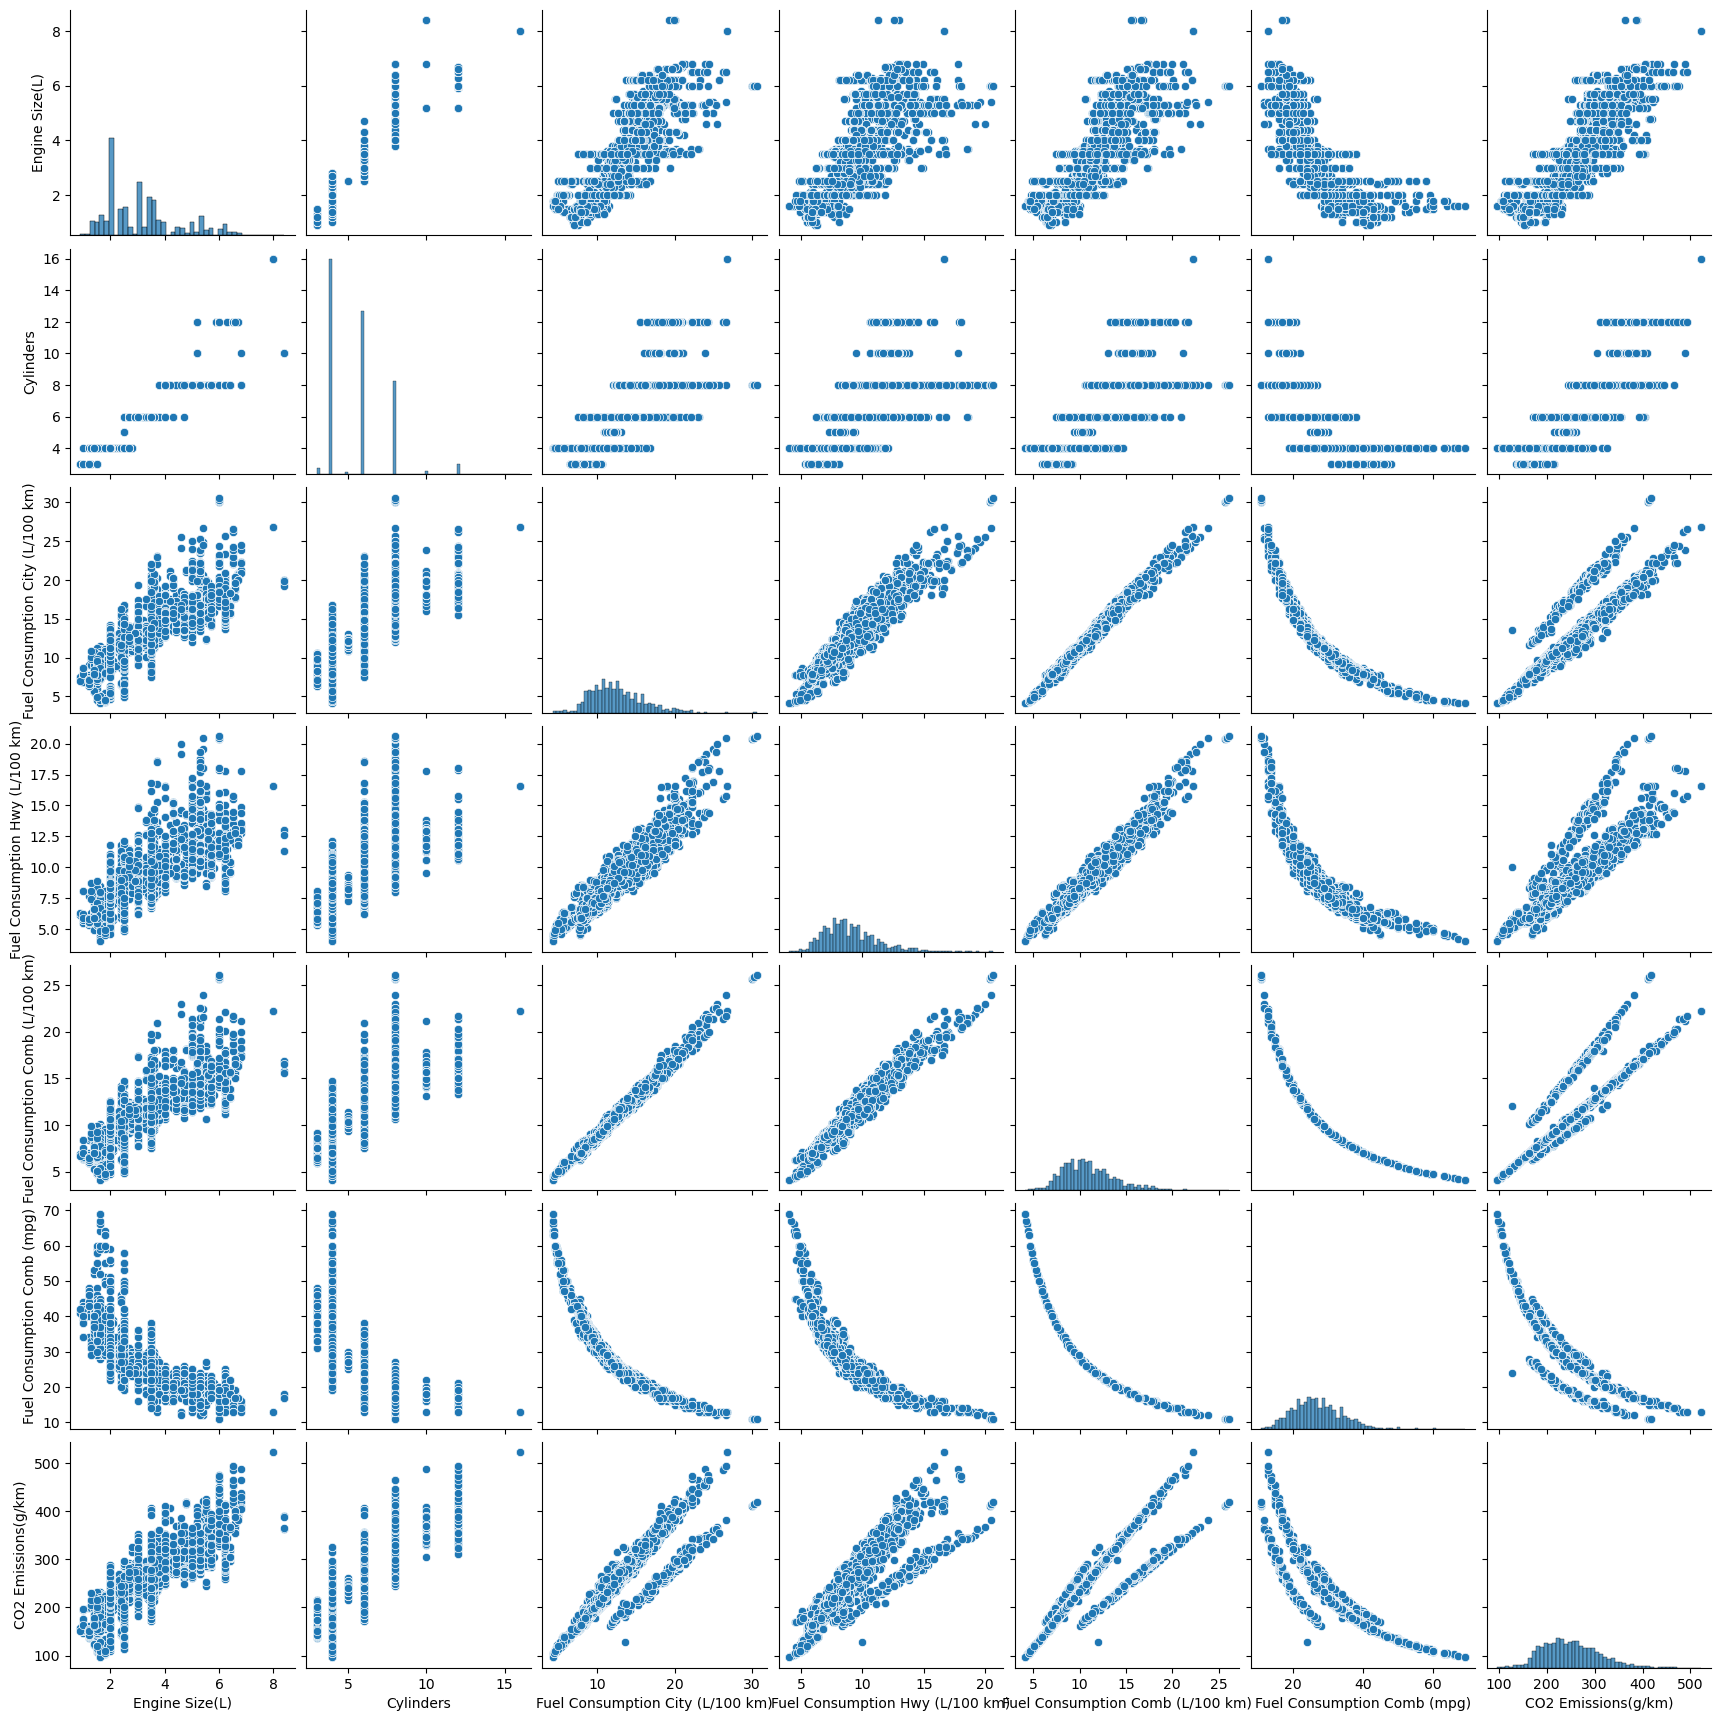

In [11]:
sns.pairplot(df)

## Get columns with object values.

In [12]:
target = []
for i in df.columns:
    col = df[i]
    if type(col[0]) == str:
        target.append(i)
        print(i)

Make
Model
Vehicle Class
Transmission
Fuel Type


## Converting object values to int.

In [13]:
from sklearn.preprocessing import LabelEncoder
for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

## Features selection.

In [14]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [15]:
X = df.drop("CO2 Emissions(g/km)", axis=1)
y = df["CO2 Emissions(g/km)"]

## Data splitting.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=41)

## Linear regression.

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

## Get the prediction.

In [18]:
y_predLR = LR.predict(x_test)

## Get r2_score of the model.

In [19]:
from sklearn.metrics import r2_score

accLR = r2_score(y_test, y_predLR)
accLR

0.9214703784055313

## RandomForest 

In [20]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(x_train, y_train)

## Get prediction

In [21]:
y_predRF = RF.predict(x_test)

## Get accuracy of RF

In [22]:
accRF = r2_score(y_test,y_predRF)
accRF

0.9978392678316551

## KNN.

In [23]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)

## Get prediction.

In [24]:
y_predKNN = KNN.predict(x_test)

## Get accuracy of KNN.

In [25]:
accKNN = r2_score(y_test, y_predKNN)
accKNN

0.9211559958952141

## DecisionTree.

In [26]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, random_state=20).fit(x_train, y_train)

## Get the prediction.

In [27]:
y_predDT = DT.predict(x_test)

## Get the accuracy.

In [28]:
accDT = r2_score(y_test, y_predDT)
accDT

0.9961956282063038

## All models accuracy.

In [29]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["Linear Regression", "Random Forest",
                                                  "KNN","Decision Tree"])
models = {'Linear Regression' : LR, 'Random Forest' : RF, 'KNN' : KNN, 'Decision Tree' : DT}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(y_test, y_pred = model.predict(x_test))

In [30]:
allacc

,Accuracy
Linear Regression,0.92147
Random Forest,0.997839
KNN,0.921156
Decision Tree,0.996196


<AxesSubplot:title={'center':'Final models accuracy'}>

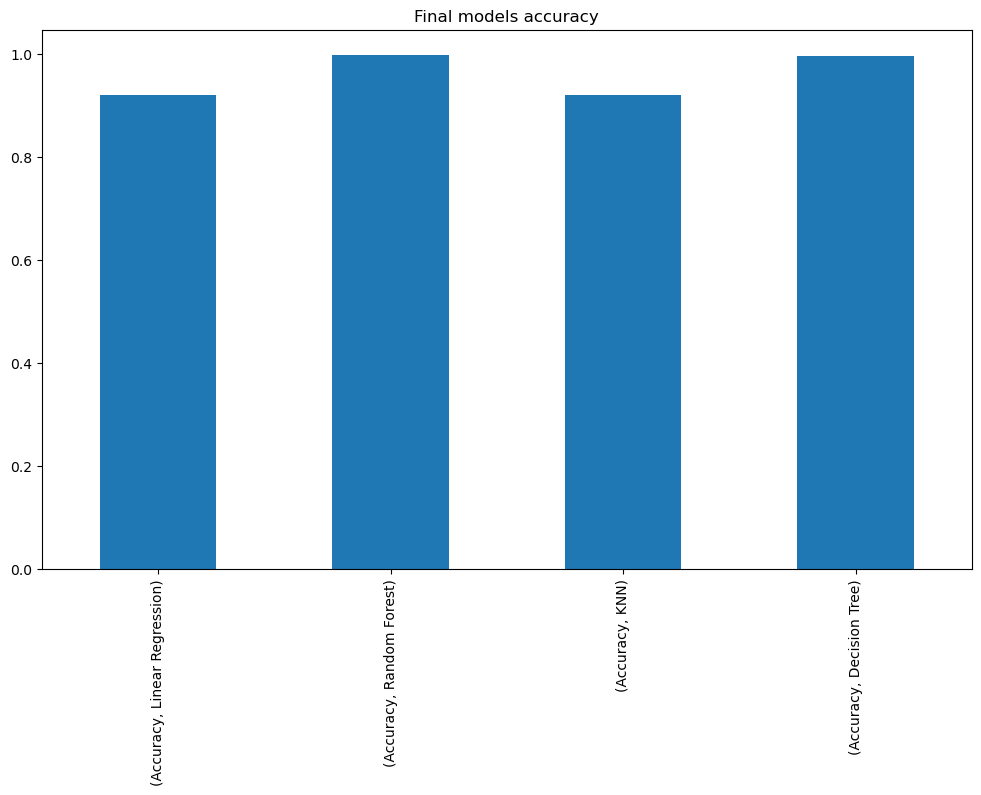

In [31]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')